<h1>FIFA 23 ML Project <img src="https://img.icons8.com/color/48/null/football-team.png"/></h1>

In [341]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [342]:
data = pd.read_csv("../input/fifa-23-complete-player-dataset/players_fifa23.csv")
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [4]:
data.shape

(18539, 90)

In [343]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
       'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
       'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
       'GKRating']

data = data[needed_columns]

<img src="https://gamesmix.net/wp-content/uploads/2022/03/FIFA-23.jpeg" width="1000"/>

<h2>EDA <img src="https://img.icons8.com/color/48/null/strategy-board.png" width="38"/></h2>

<h3>1. Does the Age of the Player Affect on his Ball Control Performance?</h3>

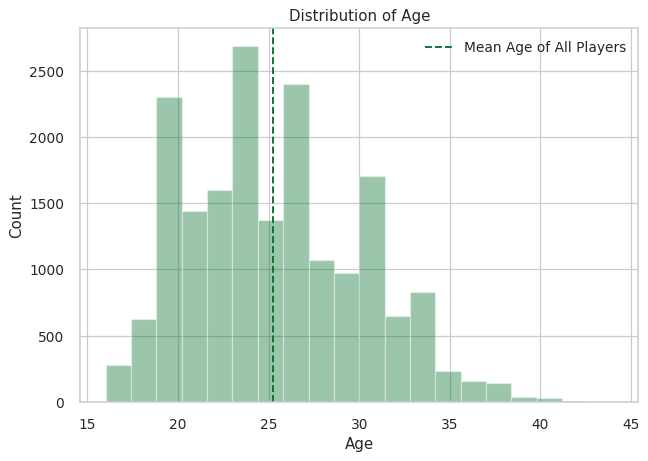

In [301]:
sns.set_palette("Greens_r")
plt.figure(dpi=90)
sns.distplot(x=data['Age'], kde=False, bins=20)
plt.axvline(x=np.mean(data['Age']), ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

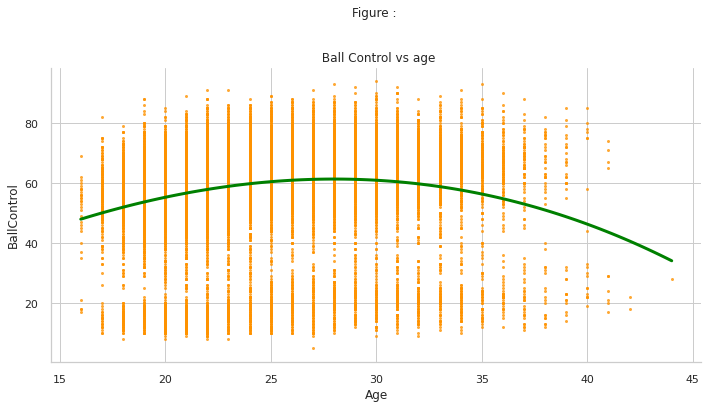

In [312]:
sns.set_palette("Wistia_r")
sns.lmplot(x="Age", y="BallControl",data=data,markers=".",
           order=3, ci=None, line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Ball Control vs age");
plt.show()

<h4>- So We can deduce that the age has an effect on the Player's Ball Control.</br></br>
    - While the Age is increasing, the Ball Control decreases.
</h4>

<p style="font-size:20px">So I can advice my Club to buy Players with age < 30 So the Player has a great Ball Control skill.</p>

<h3>2. Show how Height affects different factors like stamina, dribbling, pace, passing and HeadingAccuracy:</h3> 

<AxesSubplot:xlabel='Height', ylabel='Value'>

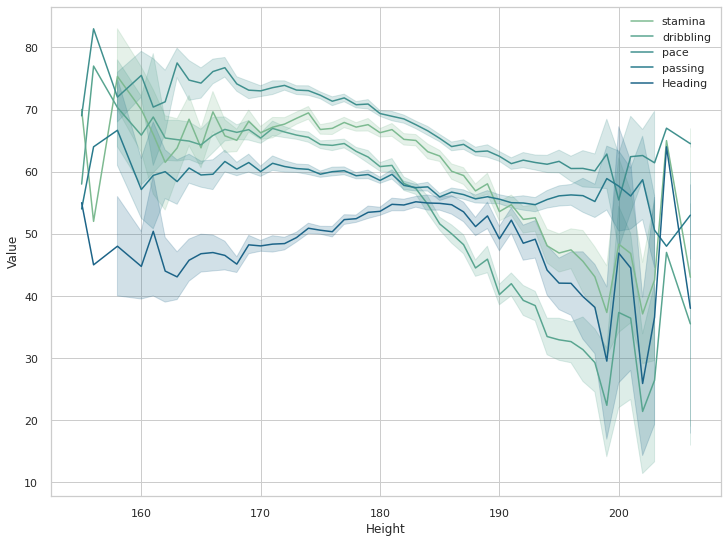

In [322]:
sns.set_palette("crest")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Value")

sns.lineplot(x='Height', y='Stamina', data=data, legend='brief', label='stamina')
sns.lineplot(x='Height', y='Dribbling', data=data, legend='brief', label='dribbling')
sns.lineplot(x='Height', y='PaceTotal', data=data, legend='brief', label='pace')
sns.lineplot(x='Height', y='PassingTotal', data=data, legend='brief', label='passing')
sns.lineplot(x='Height', y='HeadingAccuracy', data=data, legend='brief', label='Heading')

<h4>- As height increases, features like stamina, dribbling, pace, passing decreases.</br> </br>
    - As height increases, features like Heading increase.</h4>

<h3>3. Show if there is a realtion between Wage and Overall of the Players:</h3>

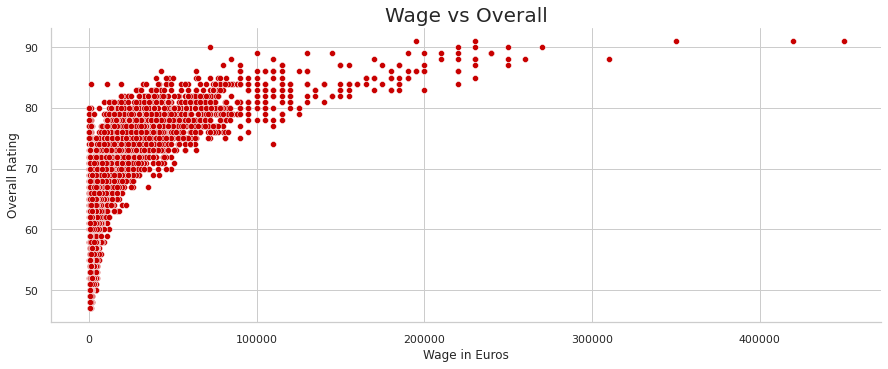

In [337]:
sns.set_palette("seismic_r")
sns.relplot(x='WageEUR',y='Overall',palette = 'viridis', aspect=2.5,data=data)
plt.title('Wage vs Overall',fontsize = 20)
plt.xlabel('Wage in Euros')
plt.ylabel('Overall Rating')
plt.show()

<h4>- As the Overall Rating Increase, the Wage of the Player Increases too.</h4>

<h3>4. Show the top Quikest Players:</h3>

In [338]:
top_acc = data.sort_values(by=["Acceleration"], ascending=False)

<AxesSubplot:xlabel='Name', ylabel='Acceleration'>

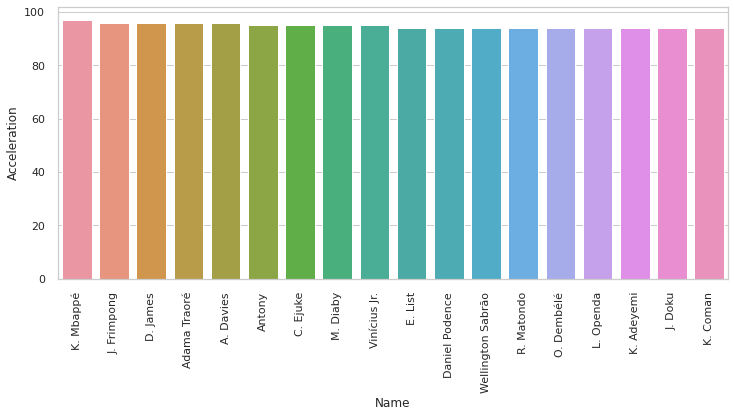

In [339]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Acceleration", data=top_acc.head(20))

<h3>5. Determine if their is a relation between the Position of the Player and his Wage and Value:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='WageEUR'>

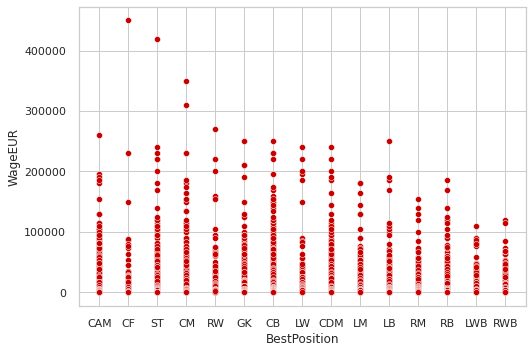

In [359]:
sns.scatterplot(x="BestPosition", y="WageEUR", data=data)

<AxesSubplot:xlabel='BestPosition', ylabel='ValueEUR'>

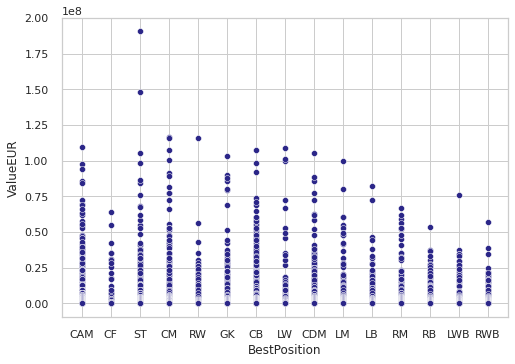

In [367]:
sns.set_palette("CMRmap")
sns.scatterplot(x="BestPosition", y="ValueEUR", data=data)

<h4>- So we can see that the Players in Positions LM, RM, RB, LWB, RWB got the lowest Wages.</br></br>
    - And the Players With Positions LB, RB, LWB, RWB have the lowest Values.</h4>

<h3>6. See the Nationality of the Players that got the heighest Wages:</h3>

In [348]:
top_wages = data.sort_values(by=["WageEUR"], ascending=False)

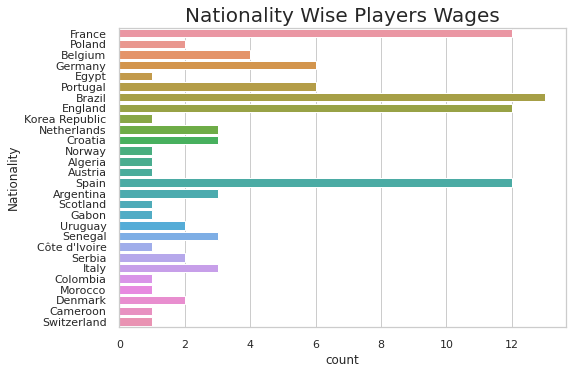

In [357]:
sns.countplot(y="Nationality",data=top_wages.head(100))
plt.title("Nationality Wise Players Wages",
          fontsize=20);

<h4>So we can deduce that the Players that got the Maximum Wage are from Brazil, France, England and Spain.</h4>

<h3>7. Show the effect of the Age on the Potential of the Players:</h3>

<AxesSubplot:xlabel='Age', ylabel='Potential'>

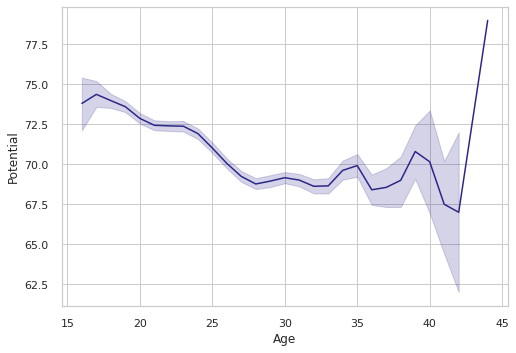

In [370]:
sns.lineplot(x="Age", y="Potential", data=data)

<h4>While the Age Increases the Potential of the Player Decreases.</h4>

<h3>8. View the Top 50 Players and their Clubs:</h3>

In [ ]:
top_rated = data.sort_values(by=["Overall"], ascending=False)
top50 = top_rated.head(50)

<h3>Plot The Top 50 Players</h3>

<AxesSubplot:xlabel='Name', ylabel='Overall'>

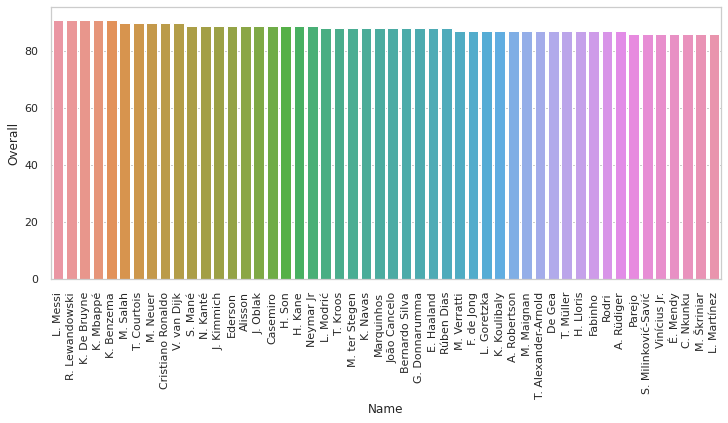

In [284]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Overall", data=top50)

<AxesSubplot:xlabel='Club', ylabel='count'>

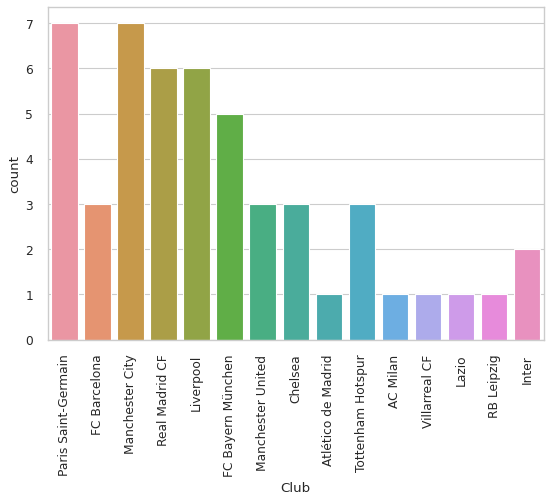

In [276]:
plt.figure(dpi=80)
plt.xticks(rotation=90)
sns.countplot(x="Club", data=top50)

<h4>- Paris Saint-Germainand Machester City have the maximum top Players numbers.</br></br>
    - Liverpool and Real Madrid have the second Maximum top Players numbers.</h4>


<h2>Data Preprocessing:</h2>

<h3>1. Handle the missing values:</h3>

In [6]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, " ", data[i].isnull().sum())

ContractUntil   92


<h4>ContractUntil Column:</h4>

In [7]:
print("The percentage of the null values is: ", (data["ContractUntil"].isnull().sum()/data.shape[0])*100, "%")

The percentage of the null values is:  0.49625114623226707 %


As the percentage of nulls is small so we can drop the values of nulls in that column.

In [8]:
data.drop(data[data["ContractUntil"].isnull()].index, axis = 0, inplace =True)

In [9]:
data["ContractUntil"].isnull().sum()

0

<h3>2. Handle The Categorical Columns:</h3>

In [10]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

Name
BestPosition
Club
PreferredFoot
AttackingWorkRate
DefensiveWorkRate


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["PreferredFoot"] = le.fit_transform(data["PreferredFoot"])
data["AttackingWorkRate"] = le.fit_transform(data["AttackingWorkRate"])
data["DefensiveWorkRate"] = le.fit_transform(data["DefensiveWorkRate"])
data["Club"] = le.fit_transform(data["Club"])


In [373]:
mapping = {'CAM': 0, 'CF': 1, 'ST': 2, 'CM': 3, 'RW': 4, 'GK': 5, 'CB': 6, 'LW': 7, 'CDM': 8, 'LM': 9, 'LB': 10,
            'RM': 11, 'RB': 12, 'LWB': 13, 'RWB': 14}

data = data.replace({'BestPosition': mapping})

In [247]:
X = data.drop(["Name", "BestPosition", "Nationality", "ID"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

<h3>3. Handle the Imbalanced Data:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

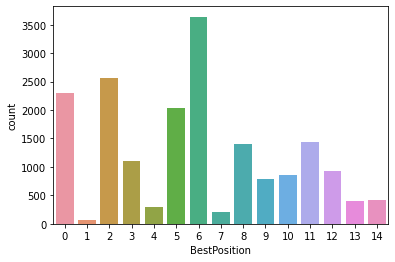

In [14]:
sns.countplot(x="BestPosition", data = Y)

In [15]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

In [16]:
print(f' X_shape: {X.shape} \n y_shape: {Y.shape}')

 X_shape: (54600, 78) 
 y_shape: (54600, 1)


<AxesSubplot:xlabel='BestPosition', ylabel='count'>

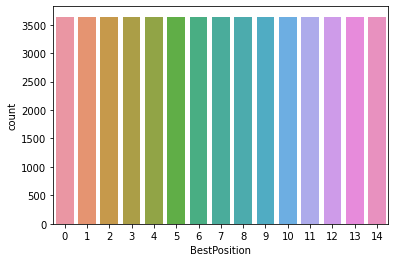

In [17]:
sns.countplot(x="BestPosition", data = Y)

<h3>4. Feature Scaling:</h3>

In [18]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

<h3>5. Perform Dimentionality Reduction:</h3>

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 39) # Reduce the Dimention of the Data to its half
X = pd.DataFrame(pca.fit_transform(X))

<h2>Split the Data to Train and Test sets:</h2>

In [20]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

<h2>Modeling</h2>

<h3>A. Predict the Position of the Player Using 8 Classification Algorithms:</h3>

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))
    
models_names = []
models_scores = []

<h3>1. Logistic Regression:</h3>

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [23]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [24]:
lr.score(X_Train, Y_Train)

0.7730769230769231

In [25]:
lr.score(X_Test, Y_Test)

0.7744505494505495

In [26]:
Y_Pred_lr = lr.predict(X_Test)

In [27]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [28]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.82      0.72      0.76       704
           1       0.85      0.96      0.90       740
           2       0.95      0.90      0.92       692
           3       0.83      0.92      0.87       700
           4       0.56      0.52      0.54       720
           5       1.00      1.00      1.00       764
           6       0.96      0.92      0.94       721
           7       0.57      0.58      0.58       755
           8       0.89      0.90      0.90       727
           9       0.68      0.65      0.67       745
          10       0.71      0.72      0.72       745
          11       0.73      0.69      0.71       734
          12       0.68      0.67      0.68       701
          13       0.70      0.73      0.72       730
          14       0.70      0.72      0.71       742

    accuracy                           0.77     10920
   macro avg      

<h3>2. Random Forest:</h3>

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=100)

In [30]:
rf.fit(X_Train, Y_Train)

RandomForestClassifier()

In [31]:
rf.score(X_Train, Y_Train)

1.0

In [32]:
rf.score(X_Test, Y_Test)

0.9097069597069597

In [33]:
Y_Pred_rf = rf.predict(X_Test)

In [34]:
models_names.append("Random Forest")
models_scores.append(rf.score(X_Test, Y_Test))

In [35]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       704
           1       0.98      1.00      0.99       740
           2       0.94      0.92      0.93       692
           3       0.82      0.93      0.87       700
           4       0.90      0.97      0.93       720
           5       1.00      1.00      1.00       764
           6       0.95      0.87      0.91       721
           7       0.96      0.97      0.96       755
           8       0.88      0.89      0.88       727
           9       0.85      0.88      0.86       745
          10       0.91      0.92      0.92       745
          11       0.85      0.78      0.81       734
          12       0.89      0.92      0.91       701
          13       0.92      0.95      0.93       730
          14       0.92      0.95      0.94       742

    accuracy                           0.91     10920
   macro avg       0.91 

<h3>3. XGB:</h3>

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [37]:
xgb.fit(X_Train, Y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [38]:
xgb.score(X_Train, Y_Train)

0.9999313186813187

In [39]:
xgb.score(X_Test, Y_Test)

0.9217032967032966

In [40]:
Y_Pred_xgb = xgb.predict(X_Test)

In [41]:
models_names.append("XGB")
models_scores.append(xgb.score(X_Test, Y_Test))

In [42]:
classification_report_fun("XGB", Y_Test, Y_Pred_xgb)

The Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       704
           1       0.99      1.00      0.99       740
           2       0.98      0.94      0.96       692
           3       0.88      0.93      0.91       700
           4       0.90      0.95      0.93       720
           5       1.00      1.00      1.00       764
           6       0.96      0.91      0.94       721
           7       0.94      0.98      0.96       755
           8       0.91      0.92      0.92       727
           9       0.87      0.87      0.87       745
          10       0.93      0.90      0.92       745
          11       0.84      0.83      0.84       734
          12       0.90      0.89      0.90       701
          13       0.91      0.97      0.94       730
          14       0.90      0.94      0.92       742

    accuracy                           0.92     10920
   macro avg       0.92      0.92 

<h3>4. Decision Tree:</h3>

In [43]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 12)

In [44]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=12, max_features=39)

In [45]:
dt.score(X_Train, Y_Train)

0.7514423076923077

In [46]:
dt.score(X_Test, Y_Test)

0.6707875457875457

In [47]:
Y_Pred_dt = dt.predict(X_Test)

In [48]:
models_names.append("Decision Tree")
models_scores.append(dt.score(X_Test, Y_Test))

In [49]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       704
           1       0.83      0.88      0.85       740
           2       0.85      0.73      0.78       692
           3       0.66      0.67      0.66       700
           4       0.54      0.61      0.58       720
           5       1.00      1.00      1.00       764
           6       0.87      0.81      0.84       721
           7       0.60      0.68      0.64       755
           8       0.68      0.69      0.69       727
           9       0.60      0.54      0.57       745
          10       0.63      0.58      0.60       745
          11       0.52      0.49      0.50       734
          12       0.57      0.54      0.55       701
          13       0.62      0.74      0.67       730
          14       0.58      0.67      0.62       742

    accuracy                           0.67     10920
   macro avg       0.67 

<h3>5. Adaboost:</h3>

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [51]:
ada.fit(X_Train, Y_Train)

AdaBoostClassifier()

In [52]:
ada.score(X_Train, Y_Train)

0.13340201465201465

In [53]:
ada.score(X_Test, Y_Test)

0.13333333333333333

In [54]:
Y_Pred_ada = dt.predict(X_Test)

In [55]:
models_names.append("Adaboost")
models_scores.append(ada.score(X_Test, Y_Test))

In [56]:
classification_report_fun("Adaboost", Y_Test, Y_Pred_ada)

The Classification Report for Adaboost Classifier:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       704
           1       0.83      0.88      0.85       740
           2       0.85      0.73      0.78       692
           3       0.66      0.67      0.66       700
           4       0.54      0.61      0.58       720
           5       1.00      1.00      1.00       764
           6       0.87      0.81      0.84       721
           7       0.60      0.68      0.64       755
           8       0.68      0.69      0.69       727
           9       0.60      0.54      0.57       745
          10       0.63      0.58      0.60       745
          11       0.52      0.49      0.50       734
          12       0.57      0.54      0.55       701
          13       0.62      0.74      0.67       730
          14       0.58      0.67      0.62       742

    accuracy                           0.67     10920
   macro avg       0.67      

<h3>6. light GBM:</h3>

In [57]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 15)

In [58]:
lgbm.fit(X_Train, Y_Train)

LGBMClassifier(max_depth=15)

In [59]:
lgbm.score(X_Train, Y_Train)

0.9980540293040293

In [60]:
lgbm.score(X_Test, Y_Test)

0.9112637362637362

In [61]:
Y_Pred_lgbm = lgbm.predict(X_Test)

In [62]:
models_names.append("light GBM")
models_scores.append(lgbm.score(X_Test, Y_Test))

In [63]:
classification_report_fun("light GBM", Y_Test, Y_Pred_lgbm)

The Classification Report for light GBM Classifier:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       704
           1       0.98      1.00      0.99       740
           2       0.98      0.93      0.95       692
           3       0.88      0.92      0.90       700
           4       0.88      0.95      0.91       720
           5       1.00      1.00      1.00       764
           6       0.96      0.92      0.94       721
           7       0.91      0.96      0.94       755
           8       0.91      0.91      0.91       727
           9       0.85      0.84      0.84       745
          10       0.92      0.91      0.91       745
          11       0.84      0.79      0.81       734
          12       0.90      0.87      0.88       701
          13       0.91      0.96      0.93       730
          14       0.88      0.95      0.91       742

    accuracy                           0.91     10920
   macro avg       0.91     

<h3>7. CatBoost:</h3>

In [66]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(max_depth = 10, iterations=5, learning_rate=0.3)

In [67]:
cb.fit(X_Train, Y_Train)

0:	learn: 1.7988314	total: 1.27s	remaining: 5.07s
1:	learn: 1.5251994	total: 2.61s	remaining: 3.91s
2:	learn: 1.3455505	total: 3.94s	remaining: 2.63s
3:	learn: 1.2230403	total: 5.16s	remaining: 1.29s
4:	learn: 1.1191453	total: 6.39s	remaining: 0us


In [68]:
cb.score(X_Train, Y_Train)

0.6557921245421245

In [69]:
cb.score(X_Test, Y_Test)

0.6382783882783882

In [73]:
Y_Pred_cb = cb.predict(X_Test)

In [74]:
models_names.append("CatBoost")
models_scores.append(cb.score(X_Test, Y_Test))

In [75]:
classification_report_fun("CatBoost", Y_Test, Y_Pred_cb)

The Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       704
           1       0.64      0.77      0.70       740
           2       0.75      0.74      0.75       692
           3       0.61      0.69      0.65       700
           4       0.50      0.47      0.48       720
           5       1.00      1.00      1.00       764
           6       0.85      0.81      0.83       721
           7       0.56      0.51      0.53       755
           8       0.66      0.67      0.67       727
           9       0.57      0.52      0.54       745
          10       0.62      0.63      0.62       745
          11       0.50      0.44      0.47       734
          12       0.58      0.56      0.57       701
          13       0.58      0.67      0.62       730
          14       0.57      0.65      0.60       742

    accuracy                           0.64     10920
   macro avg       0.64      

<h3>8. KNN:</h3>

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

In [77]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [78]:
knn.score(X_Train, Y_Train)

0.8526556776556776

In [79]:
knn.score(X_Test, Y_Test)

0.804945054945055

In [80]:
Y_Pred_knn = cb.predict(X_Test)

In [83]:
models_names.append("KNN")
models_scores.append(knn.score(X_Test, Y_Test))

In [84]:
classification_report_fun("KNN", Y_Test, Y_Pred_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       704
           1       0.64      0.77      0.70       740
           2       0.75      0.74      0.75       692
           3       0.61      0.69      0.65       700
           4       0.50      0.47      0.48       720
           5       1.00      1.00      1.00       764
           6       0.85      0.81      0.83       721
           7       0.56      0.51      0.53       755
           8       0.66      0.67      0.67       727
           9       0.57      0.52      0.54       745
          10       0.62      0.63      0.62       745
          11       0.50      0.44      0.47       734
          12       0.58      0.56      0.57       701
          13       0.58      0.67      0.62       730
          14       0.57      0.65      0.60       742

    accuracy                           0.64     10920
   macro avg       0.64      0.64 

<h3>Compare the 8 Classification Algorithms:</h3>

In [85]:
comp = pd.DataFrame()
comp['name'] = models_names
comp['score'] = models_scores
comp

,name,score
0,Logistic Regression,0.774451
1,Random Forest,0.909707
2,XGB,0.921703
3,Decision Tree,0.670788
4,Adaboost,0.133333
5,light GBM,0.911264
6,CatBoost,0.638278
7,CatBoost,0.638278
8,KNN,0.804945
9,KNN,0.804945


In [86]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.774451
1,Random Forest,0.909707
2,XGB,0.921703
3,Decision Tree,0.670788
4,Adaboost,0.133333
5,light GBM,0.911264
6,CatBoost,0.638278
7,CatBoost,0.638278
8,KNN,0.804945
9,KNN,0.804945


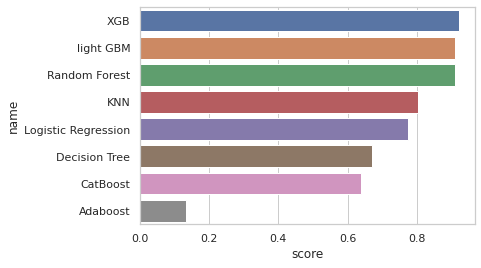

In [87]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))

<h3>B. Group the Players in Clusters Based on their Similarities Using 4 Clustering Algorithms:</h3>

<h3>Extracting players with overall above 86:</h3>

In [371]:
X_clus = data[data.Overall > 86] 
X_clus.shape

(43, 82)

In [ ]:
names = X_clus["Name"].tolist() # saving names for later

X_clus = X_clus.drop(['Name', 'Nationality', 'ID'], axis = 1)

#Feature Scaling
X_clus = mms.fit_transform(X_clus)

<h3>Perform Dimentionality Reduction:</h3>

In [99]:
pca = PCA(n_components = 2) # Reduce the Dimention of the Data to its half
X_clus = pd.DataFrame(pca.fit_transform(X_clus))

<h2>Clustering:</h2>

In [100]:
clus_names = []
clus_scores = []

<h3>1. KMeans:</h3>

<h4>Use the Elbow function to determine the optimal number of Clusters:</h4>

In [101]:
import random
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

visualizer = KElbowVisualizer(KMeans(), timings=False)

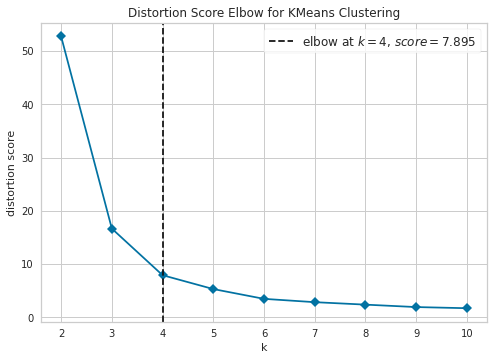

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
visualizer.fit(X_clus)
visualizer.show()

<h4>So the Optimal number of clusters is 4</h4>

In [103]:
kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_clus)

# get the cluster labels
labels = kmeans.predict(X_clus)

# cluster values
kmeans_clusters = kmeans.labels_.tolist()

In [104]:
X_kmeans = X_clus.copy()
X_kmeans['cluster'] = kmeans_clusters
X_kmeans['name'] = names
X_kmeans.columns = ['x', 'y', 'cluster', 'name']
X_kmeans.head()

,x,y,cluster,name
0,-1.454918,-1.884138,2,L. Messi
1,-1.197165,-1.394994,2,K. Benzema
2,-1.339649,-1.340175,2,R. Lewandowski
3,-1.926870,-0.572596,0,K. De Bruyne
4,-1.546036,-1.581132,2,K. Mbappé


<h3>Plot the Clusters of the K-means Algorithm:</h3>

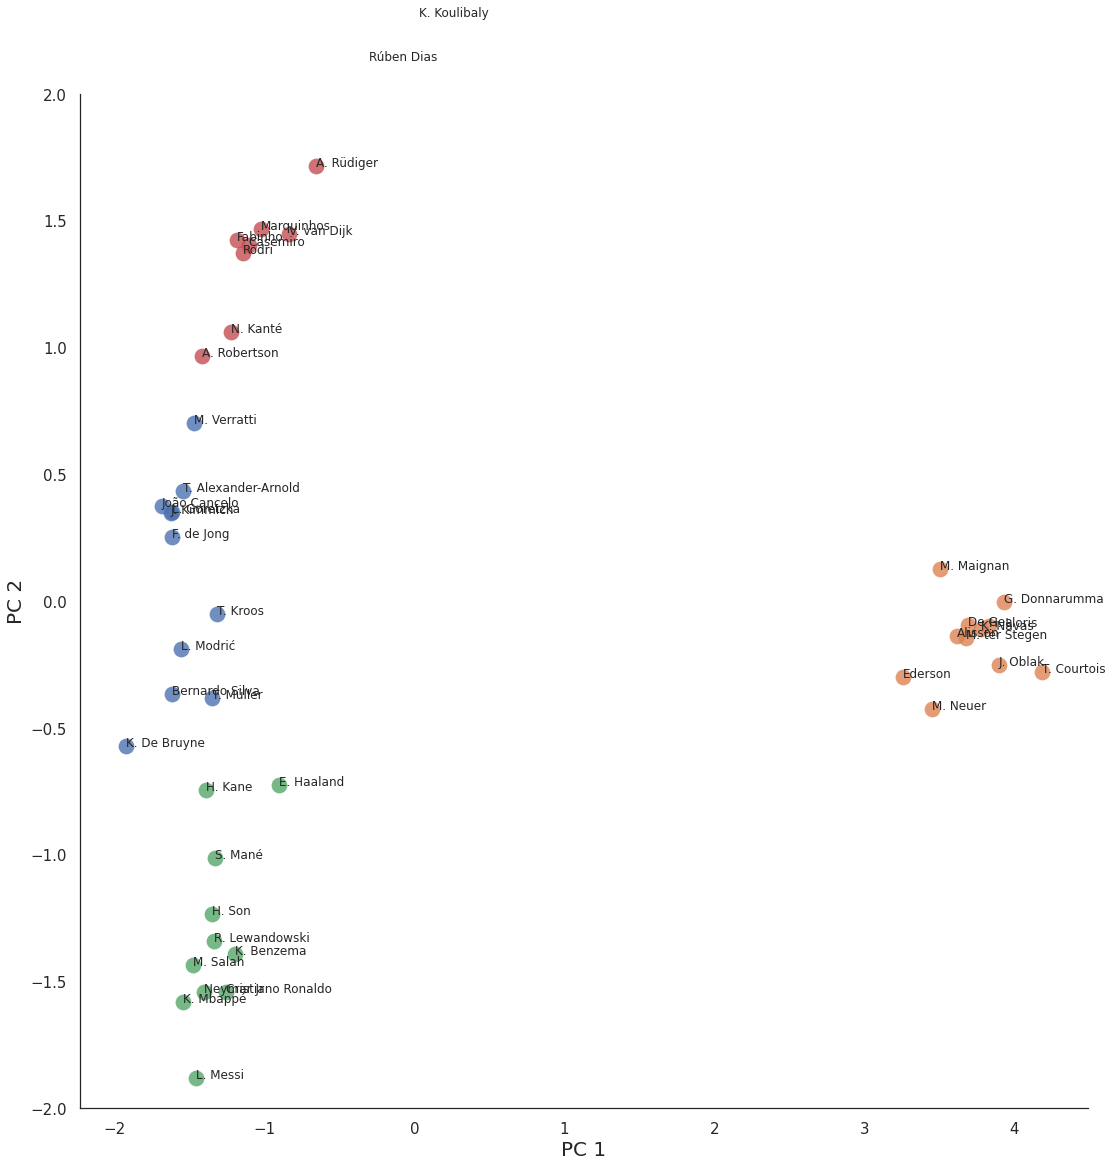

In [105]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_kmeans, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_kmeans.x, X_kmeans.y, X_kmeans.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the K-means algorithm using Silhouette coefficient:</h3>

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between <b>-1 for incorrect clustering and +1 for highly dense clustering</b>. </br>
Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated.

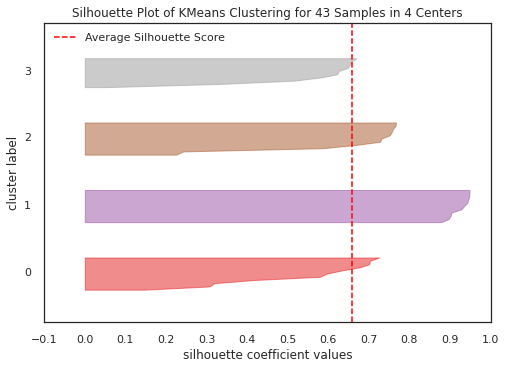

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 43 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [106]:
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X_clus)    
sil_visualizer.show()

In [107]:
silhouette_score(X_clus, kmeans.labels_)

0.6586684841017966

In [108]:
clus_names.append("K-means")
clus_scores.append(silhouette_score(X_clus, kmeans.labels_))

<h3>2. Hirerichal Clustering:</h3>

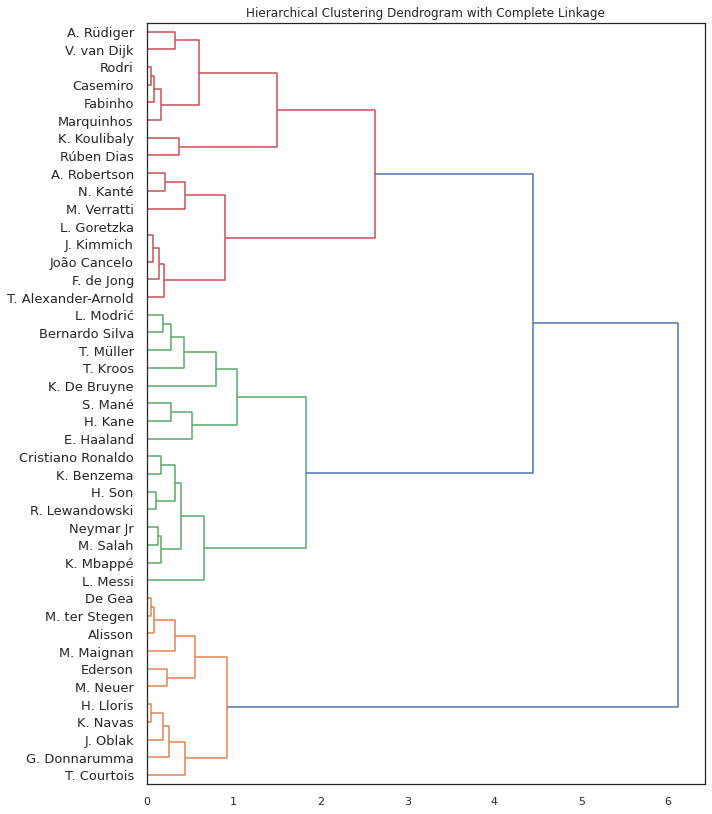

In [109]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_clus, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

In [110]:
unique_colors = set(dendrogram['color_list'])
num_clusters_hir = len(unique_colors)-1
print("Optimal number of clusters is : ", num_clusters_hir)

Optimal number of clusters is :  3


In [111]:
from sklearn.cluster import AgglomerativeClustering
cluster_hir = AgglomerativeClustering(n_clusters=num_clusters_hir, affinity='euclidean', linkage='ward')
cluster_hir.fit_predict(X_clus)

# cluster values
hir_clusters = cluster_hir.labels_.tolist()

In [112]:
print("Estimated number of noise points:", list(cluster_hir.labels_).count(-1))

Estimated number of noise points: 0


In [113]:
X_hir = X_clus.copy()
X_hir['cluster'] = hir_clusters
X_hir['name'] = names
X_hir.columns = ['x', 'y', 'cluster', 'name']
X_hir.head()

,x,y,cluster,name
0,-1.454918,-1.884138,2,L. Messi
1,-1.197165,-1.394994,2,K. Benzema
2,-1.339649,-1.340175,2,R. Lewandowski
3,-1.926870,-0.572596,2,K. De Bruyne
4,-1.546036,-1.581132,2,K. Mbappé


<h3>Plot the Clusters of the Hirerichal Clustering Algorithm:</h3>

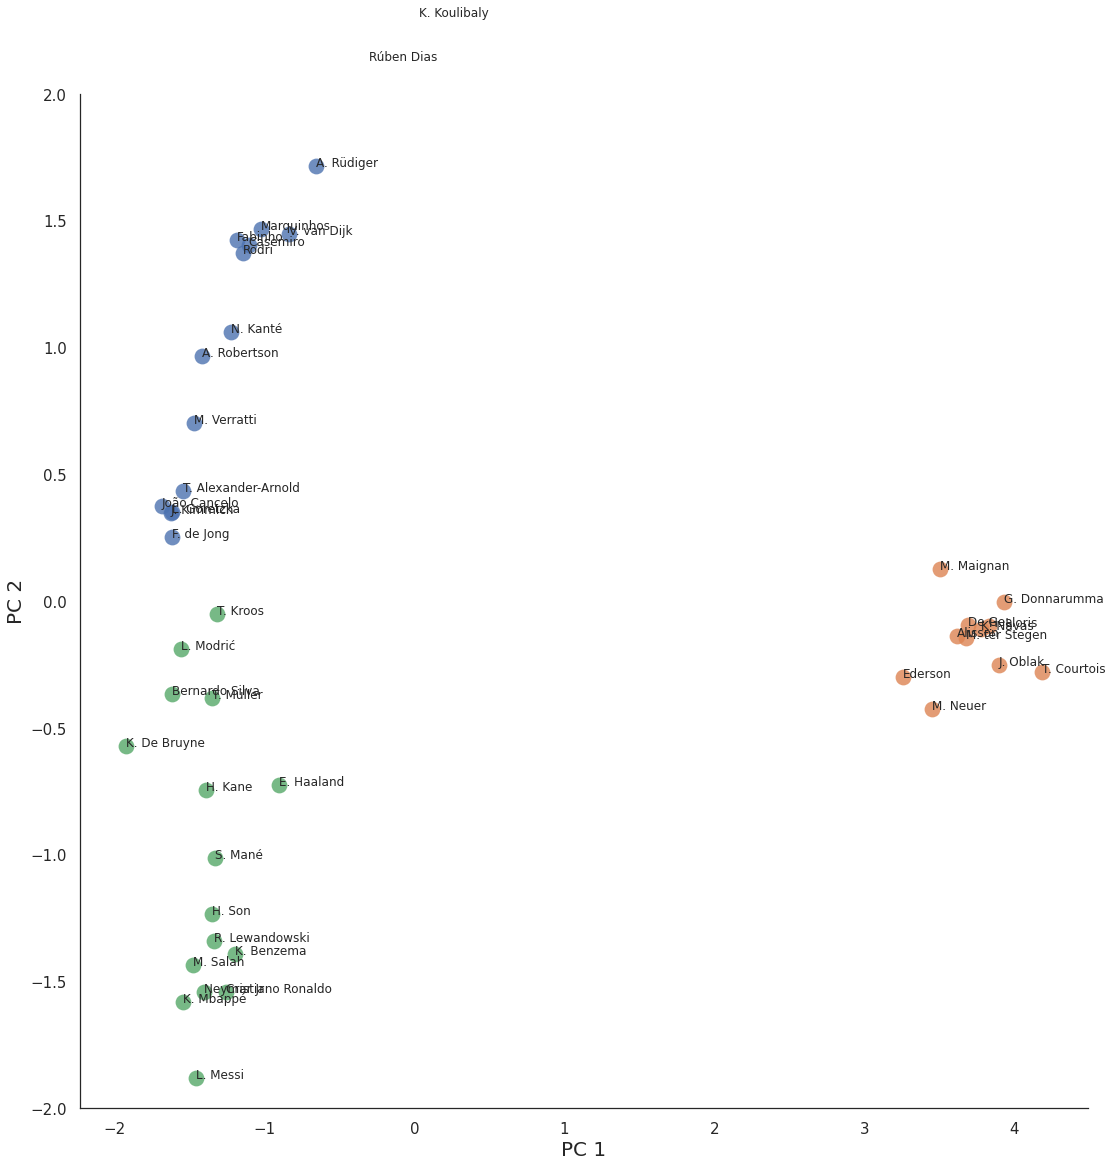

In [114]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_hir, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_hir.x, X_hir.y, X_hir.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the Hirerichal Clustring algorithm using Silhouette coefficient:</h3>

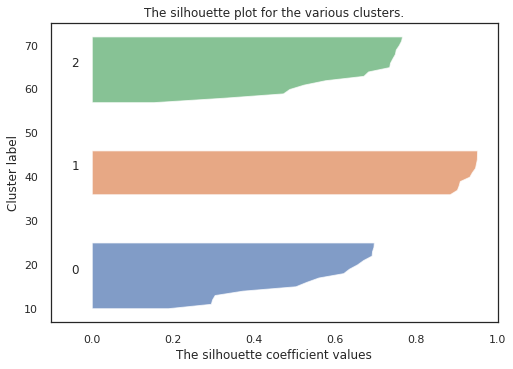

In [115]:
cluster_labels = cluster_hir.labels_
silhouette_avg = silhouette_score(X_clus, cluster_hir.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)

fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])


y_lower = 10
for i in range(num_clusters_hir):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


plt.show()

In [116]:
silhouette_score(X_clus, cluster_hir.labels_)

0.6617483192694013

In [117]:
clus_names.append("Hirerichal Clustering")
clus_scores.append(silhouette_score(X_clus, cluster_hir.labels_))

<h3>3. Density-based clustering (DBSCAN):</h3>

In [118]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db = DBSCAN(eps=0.429, min_samples=5)
db.fit_predict(X_clus)

# prediction for dbscan clusters
db_clusters = db.labels_.tolist()

In [119]:
print("Number of Cluster in the Density Based Clustering:", len(set(db_clusters)))

Number of Cluster in the Density Based Clustering: 6


In [120]:
X_db = X_clus.copy()
X_db['cluster'] = db_clusters
X_db['name'] = names
X_db.columns = ['x', 'y', 'cluster', 'name']
X_db.head()

,x,y,cluster,name
0,-1.454918,-1.884138,0,L. Messi
1,-1.197165,-1.394994,0,K. Benzema
2,-1.339649,-1.340175,0,R. Lewandowski
3,-1.926870,-0.572596,-1,K. De Bruyne
4,-1.546036,-1.581132,0,K. Mbappé


<h3>Plot the Clusters of the DBSCAN Clustering Algorithm:</h3>

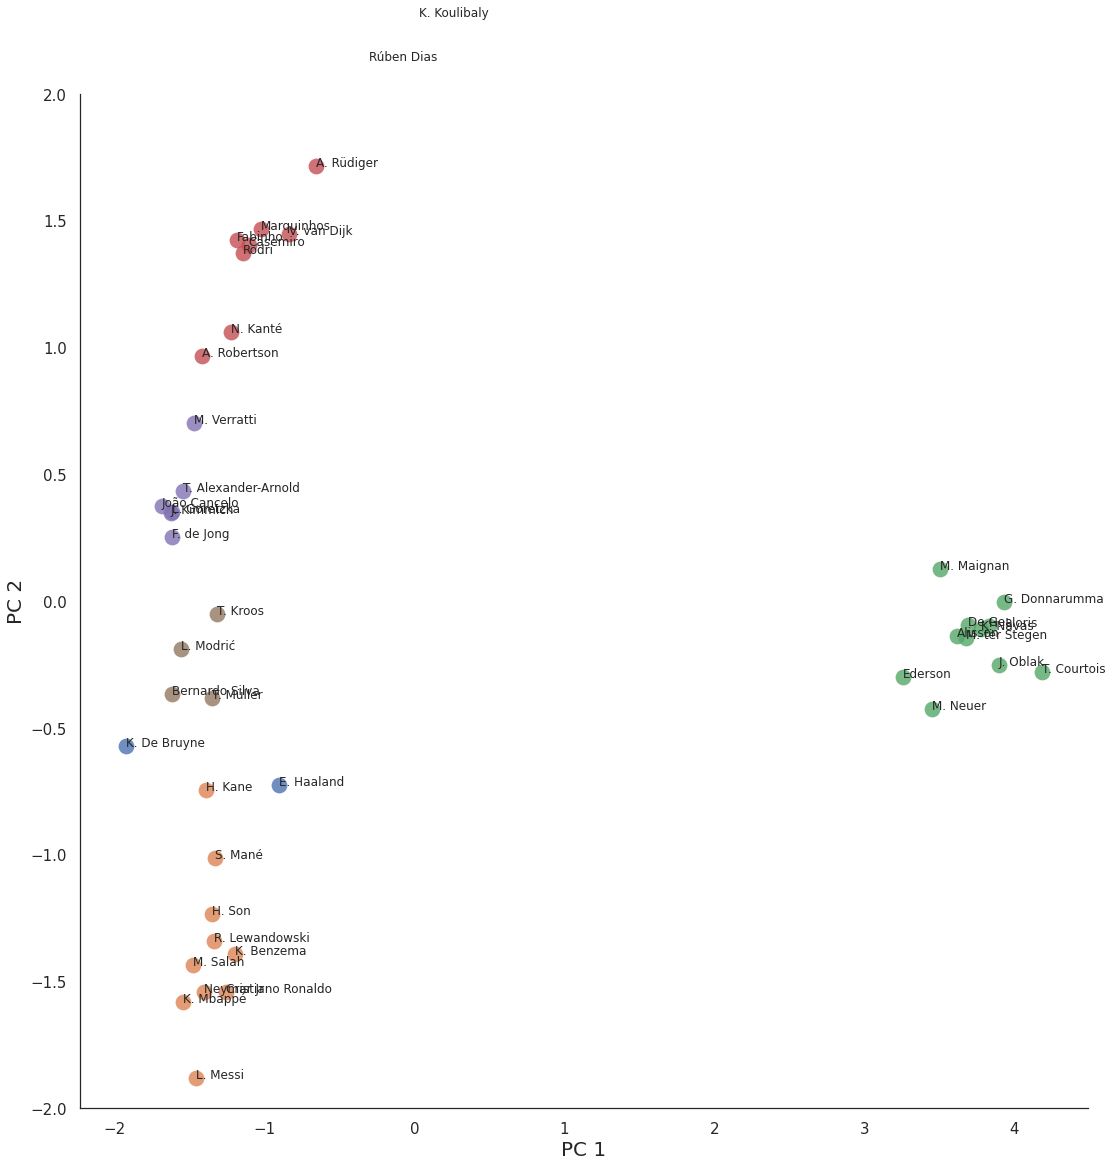

In [121]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_db, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_db.x, X_db.y, X_db.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the DBSCAN Clustring algorithm using Silhouette coefficient:</h3>

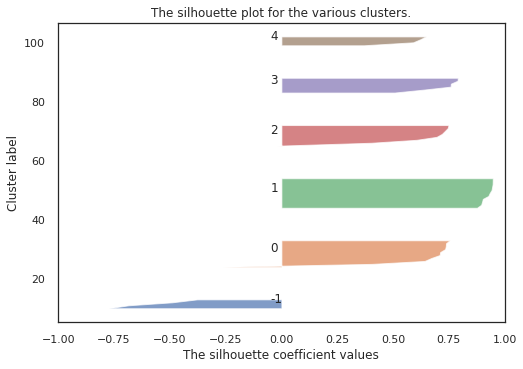

In [122]:
cluster_labels = db.labels_
silhouette_avg = silhouette_score(X_clus, db.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-1, 1])

num_clusters = len(set(db_clusters))
y_lower = 10
for i in range(-1, num_clusters-1):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [123]:
silhouette_score(X_clus, db.labels_)

0.5760147964369781

In [124]:
clus_names.append("DBSCAN")
clus_scores.append(silhouette_score(X_clus, db.labels_))

<h3>4. Distribution-based clustering:</h3>

In [125]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X_clus)

gmm_clusters = gmm.predict(X_clus).tolist()

In [126]:
X_gmm = X_clus.copy()
X_gmm['cluster'] = gmm_clusters
X_gmm['name'] = names
X_gmm.columns = ['x', 'y', 'cluster', 'name']
X_gmm.head()

,x,y,cluster,name
0,-1.454918,-1.884138,3,L. Messi
1,-1.197165,-1.394994,3,K. Benzema
2,-1.339649,-1.340175,3,R. Lewandowski
3,-1.926870,-0.572596,0,K. De Bruyne
4,-1.546036,-1.581132,3,K. Mbappé


<h3>Plot the Clusters of the Distribution-based Clustering Algorithm:</h3>

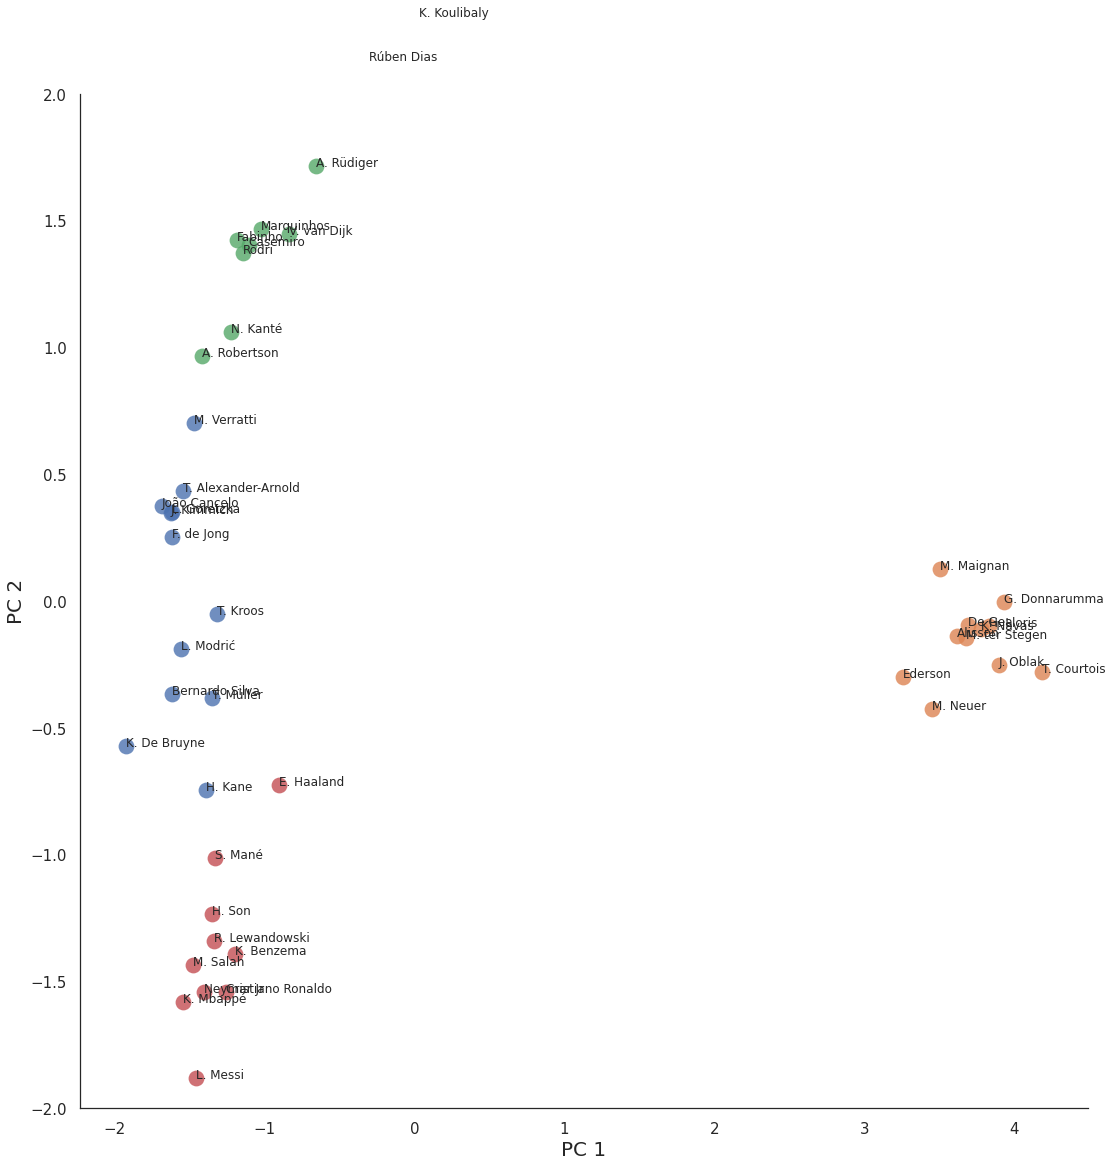

In [127]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_gmm, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_gmm.x, X_gmm.y, X_gmm.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the Distribution-based Clustring algorithm using Silhouette coefficient:</h3>

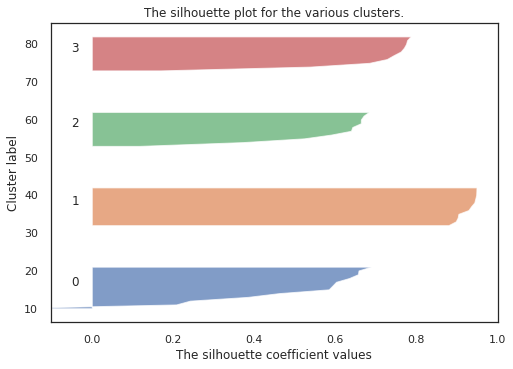

In [128]:
cluster_labels = np.array(gmm_clusters)
silhouette_avg = silhouette_score(X_clus, cluster_labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])

num_clusters = len(set(gmm_clusters))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [129]:
silhouette_score(X_clus, cluster_labels)

0.6499688092298105

In [132]:
clus_names.append("Distribution-based")
clus_scores.append(silhouette_score(X_clus, cluster_labels))

<h3>Compare the 4 Clustring Algorithms based on the Silhouette Score:</h3>

In [133]:
comp = pd.DataFrame()
comp['name'] = clus_names
comp['score'] = clus_scores
comp

,name,score
0,K-means,0.658668
1,Hirerichal Clustering,0.661748
2,DBSCAN,0.576015
3,Distribution-based,0.649969


In [134]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,K-means,0.658668
1,Hirerichal Clustering,0.661748
2,DBSCAN,0.576015
3,Distribution-based,0.649969


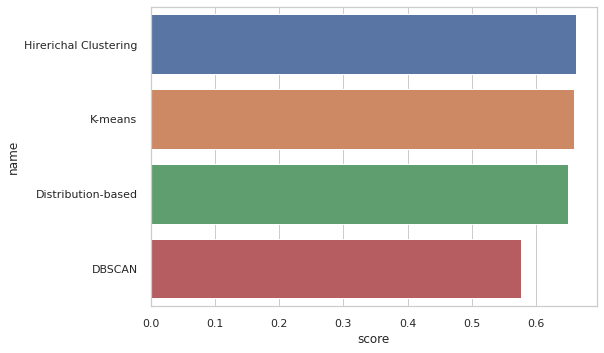

In [135]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))